Preprocessing:-

•	Grayscaling

•	Resize

•	(No need to align as radiomics doesn’t need it)

•	Orientation Correction

•	Normalizing

•	Thresholding Otsu Method

Segmentation
Feature Extraction:- Pyradiomics lib

In [ ]:
!pip install pydicom install dicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 55.8 MB/s eta 0:00:00


In [ ]:
# import matplotlib.pyplot as plt
# import pydicom
# import pydicom.data
# path= "/content/drive/MyDrive/Capstone/1_more_folder/2.000000-FSE_T2_AX-61138/"
# pass_dicom=''
# filename= pydicom.data.data_manager.get_files(path,pass_dicom)[1]
# ds= pydicom.dcmread(filename)
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pydicom
import pydicom.data
from scipy.ndimage import rotate
import numpy as np

dcm = pydicom.dcmread("/content/drive/MyDrive/Capstone/1_more_folder/2.000000-FSE_T2_AX-61138/1-11.dcm")

patient_name = dcm.PatientName
study_description = dcm.StudyDescription

print(f"Patient's Name: {patient_name}")
print(f"Study Description: {study_description}")


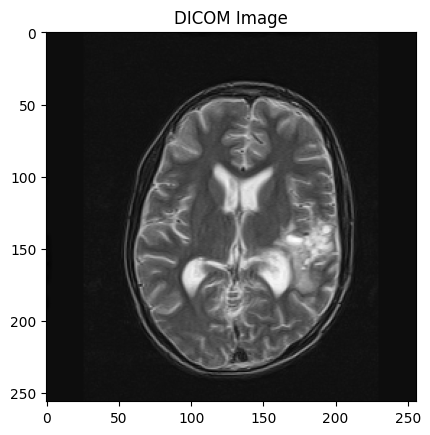

In [ ]:

# if "PixelData" in dcm:
#     pixel_data = dcm.pixel_array
#     print(f"Pixel Data Shape: {pixel_data.shape}")
# else:
#     print("No pixel data in this DICOM file.")

if "PixelData" in dcm:
    pixel_data = dcm.pixel_array
    plt.imshow(pixel_data, cmap=plt.cm.bone)  # Use 'cmap' for color mapping
    plt.title("DICOM Image")
    plt.gray()
    plt.show()
else:
    print("No pixel data in this DICOM file.")

In [ ]:
image_orientation = np.array(dcm.ImageOrientationPatient)

# Check the orientation and apply correction if needed
if not np.allclose(image_orientation, [1, 0, 0, 0, 1, 0]):
    # Rotate the image based on the orientation information
    angle = np.arctan2(image_orientation[1], image_orientation[0]) * 180 / np.pi
    rotated_image = rotate(dcm.pixel_array, angle, reshape=False, mode='constant', cval=0)
else:
    rotated_image = dcm.pixel_array

In [ ]:
# Normalize the intensity values
mean_intensity = np.mean(rotated_image)
std_intensity = np.std(rotated_image)
normalized_image = (rotated_image - mean_intensity) / std_intensity


In [ ]:
# Load your tumor segmentation model and apply it to the preprocessed image
# Example using a hypothetical segmentation model
segmentation_mask = your_tumor_segmentation_model(normalized_image)
